**평가**

머신러닝 프로세스 : 데이터 가공/변환, 모델 학습/예측, 평가

[분류 성능 평가 지표]
1. 정확도 (Accuracy)
2. 오차행렬 (Confusion-Matrix)
3. 정밀도 (Precision)
4. 재현 (Recall)
5. F1 스코어
6. ROC AUC

[분류]
1. 이진 분류
2. 멀티 분류

**정확도**

$정확도(Accuracy) = (예측 결과가 동일한 데이터 건수 /전체 예측 데이터 건수)$

$(TN + TP) / (TN + TP + FN + FP)$

- 이진 분류의 경우 정확도 하나만으로 성능을 평가하면 왜곡 가능성 존재. (타이타닉 데이터에서 단순히 성별만을 기준으로 분류해도 정확도가 높게 나올 수 있음)
- Base Estimator 상속받으면 Customized Estimator 생성 가능함
- 불균형한 데이터 세트의 분포는 아무 처리도 하지 않고 무조건 특정 결과를 지정해도 정확도가 높게 나올 수 있음.

**오차 행렬**

- 정확도의 불완전한 성능 측정 기능을 개선
- 실제 클래스 (행) / 예측 클래스 (열)

Negative (0) | Positive(1)
- | -
TN | FP
FN | TP

1. TN : 예측 negative 0, 실제 값 negative 0
2. FN : 예측 negative 1, 실제 값 positive 1
3. FP : 예측 positive 1, 실제 값 negative 0
4. TP : 예측 positive 1, 실제 값 positive 1

- 사이킷런의 오차 행렬 : confusion_matrix() api 활용
- 사기 행위, 암 검진 예측 모델 등에 활용.

**정밀도와 재현율**

$ 정밀도(precision) = TP / (FP + TP) $

$ 재현율(recall) = TP / (FN + TP) $

- Positive 데이터 세트의 예측 성능에 좀더 초점을 맞춘 평가 지표
- **정밀도** | '예측'을 1로 한 대상 중 실제 값 = 예측 값 = 1인 데이터의 비율 (a.k.a. 양성 예측도)

  실제 음성 데이터를 양성으로 오판단할 때 손실이 큰 경우(EX.스팸메일 분류) 
- **재현율** | '실제 값'이 1인 대상 중 예측 값 = 실제 값 = 1인 데이터의 비율 (a.k.a. 민감도 or TPR)
  
  실제 양성 데이터를 음성으로 오판단할 때 손실이 큰 경우 (EX. 암 판단 모델, 사기 탐지)
- 재현율은 FN을 낮추는 데, 정밀도는 FP를 낮추는 데 초점을 맞춤.
- 상호 보완 관계
- **precision_score()** , **recall_score()**
  

**정밀도/재현율 트레이드오프**

- 분류 시, 정밀도/재현율이 강조되어야 할 경우 분류의 결정 임곗값(Threshold)를 조정해 정밀도/재현율을 높일 수 있음. 
- 상호 보완 관계이므로 한 쪽을 강제로 높이면 다른 한 쪽은 떨어지는 트레이드 오프 관계
  
[사이킷런의 분류 알고리즘]
1. 예측 데이터가 특정 레이블에 속하는지 계산하기 위해 개별 레이블별 결정 확률을 구한 후 예측 확률이 큰 레이블로 분류
2. **predict_proba()** | 개별 데이터별 예측 확률 반환 메서드

**precision_recall_curve()** 
임곗값 변화에 따른 평가 지표 값

입력 파라미터 | y_true(실제 클래스값 배열), probas_pred(positive 칼럼의 예측 확률 배열)

반환 값 | 정밀도, 재현율

**정밀도와 재현율의 맹점**

positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됨.
단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용해서는 안되고, 두 개의 수치를 상호 보완할 수 있는 수준에서 적용해야 함.
1. 정밀도가 100%가 되는 방법 | 확실한 기준이 되는 경우만 Positive, 나머지는 Negative로 예측
2. 재현율이 100%가 되는 방법 | 모든 환자를 Positive로 예측

* 정밀도/재현율 둘 중 하나의 스코어만 좋으면 성능이 좋지 않은 분류임.

**F1 스코어**
- 정밀도와 재현율을 결합한 지표.
- 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 높은 값을 가짐

$F1 = 2/((1/recall)+(1/precision))$

$F1 = 2*(precision*recall)/(precision+recall)$

ex) A 예측 모델 : 정밀도 0.9, 재현율 0.1 - f1 스코어 0.18, B 예측 모델 : 정밀도 0.5, 재현율 0.5 - f1 스코어 : 0.5

**ROC 곡선, AUC**
- ROC 곡선 : 수신자 판단 곡선, 머신러닝의 이진 분류 모델의 예측 성능을 판단
- FPR(x축)가 변할 때 TPR(y축)이 어떻게 변하는지를 나타냄
- 입력 파라미터 | y_true, y_score
- 반환 값 | fpr, tpr, thresholds

In [3]:
# 사이킷런의 base estimator 클래스 상속 후 아무런 학습을 하지 않고 성별에 따라 분류
from sklearn.base import BaseEstimator 
class MyDummyClassifier(BaseEstimator) : 
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None) :
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
    def predict(self, X) :
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]) :
            if X['Sex'].iloc[i] == 1 :
                pred[i] = 0
            else :
                pred[i] = 1
                
        return pred

In [4]:
## 생성된 MyDummyClassifier를 이용해 타이타닉 생존자 예측 수행

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [5]:
# 아무런 학습을 하지 않은 분류기로 타이타닉 생존자 예측
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터 / 테스트 데이터 분할
titanic_df = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size = 0.2,random_state = 0)

In [6]:
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test,
                                                               mypredictions)))

# 단순한 알고리즘을 가지고 예측하더라도 정확도가 78%로 높게 나올 수 있음. 
# 불균형 레이블 분포에서 ML 모델 성능 판단의 경우 적합한 평가 지표가 아님.

Dummy Classifier의 정확도는 : 0.7877


In [7]:
# mnist 데이터 세트(숫자 이미지 픽셀 정보)를 불균형하게 만든 뒤 정확도 지표 적용
# 0~9 멀티 레이블 분류 세트 -> 7만 true, 나머지 false로 변형 (바이너리 레이블 분류)
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator) :
    def fit(self, X, y) :
        pass
    # 입력값으로 들어오는 x 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X) :
        return np.zeros((len(X), 1), dtype=bool)
# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True 이고 이를 astype(int)로 1로 변환, 7이 아니면 False이고 0으로 변환
y = (digits.target ==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [8]:
# 불규칙한 레이블 데이터 분포도 확인.
print('레이블 테스트 세트 크기 :',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 :{:.3f}'.format(accuracy_score(y_test,
                                                          fakepred)))

# 모든 것을 0으로만 예측해도 정확도 90% 로, 불균형 레이블 데이터 세트의 성능 지표로 사용 x

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는 :0.900


In [9]:
# 사이킷런의 오차 행렬 계산 API : confusion_matrix()
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)
# 전체 450개의 data중 TN 405개, FN 45개

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# get_clf_eval (평가를 한꺼번에 호출)
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

In [11]:
# 로지스틱 회귀 기반 타이타닉 생존자 예측, 오차 행렬, 정확도, 정밀도, 재현율 평가

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터 / 테스트 데이터 분할
titanic_df = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,
                                                    y_titanic_df,
                                                    test_size=0.20,
                                                    random_state=11)
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

# 정밀도에 비해 재현율이 낮게 출력)

오차 행렬
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


C:\Users\gyw78\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정밀도/재현율 트레이드오프

In [13]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba 결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출\n', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합 (concatenate)해 예측 확률과 결괏값을 한눈에
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n', pred_proba_result[:3])

pred_proba 결과 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출
 [[0.46190343 0.53809657]
 [0.87861542 0.12138458]
 [0.87716338 0.12283662]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.46190343 0.53809657 1.        ]
 [0.87861542 0.12138458 0.        ]
 [0.87716338 0.12283662 0.        ]]


In [14]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# x의 개별 원소들이 threshold 값보다 같거나 작으면 0, 크면 1 반환
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [15]:
from sklearn.preprocessing import Binarizer
# binarizer의 threshold 설정값, 분류 결정 임곗값임
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869


In [16]:
# binarizer의 threshold 설정값을 0.4로 설정, 즉 분류 결정 임곗값을 0.5 -> 0.4
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict =binarizer.transform(pred_proba_1)

get_clf_eval(y_test ,custom_predict)

오차 행렬
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361


In [17]:
# 테스트 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds) :
    # thresholds list 객체 내 값을 차례로 반복하며 평가 수행
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

# 재현율을 향상시키기 위해서 임곗값 0.45가 가장 정확해 보임

임곗값 0.4
오차 행렬
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361
임곗값 0.45
오차 행렬
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033
임곗값 0.5
오차 행렬
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869
임곗값 0.55
오차 행렬
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541
임곗값 0.6
오차 행렬
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377


In [18]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추측
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape :', thresholds.shape)

# 반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되 임곗값을 15step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 임곗값별 정밀도 :', np.round(precisions[thr_index], 3))
print('샘플 임곗값별 재현율 :', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 shape : (165,)
샘플 임곗값별 정밀도 : [0.341 0.372 0.415 0.448 0.505 0.585 0.688 0.774 0.913 0.935 0.938]
샘플 임곗값별 재현율 : [1.    1.    0.967 0.918 0.902 0.902 0.869 0.787 0.689 0.475 0.246]


In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

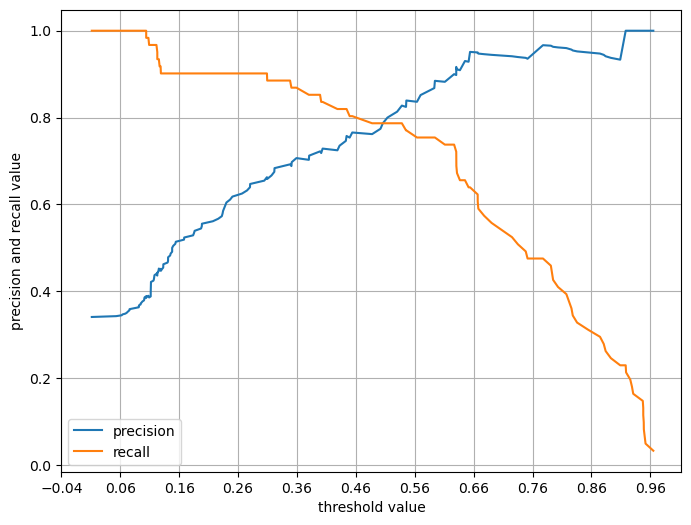

In [24]:
def precision_recall_curve_plot(y_test, pred_proba_c1) :
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율, ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, 
                                                             pred_proba_c1)
    # x축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 x축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('threshold value'); plt.ylabel('precision and recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

# 임곗값을 계속 증가시킬수록 재현율 값이 낮아지고 정밀도 값이 높아지는 양상을 띰.

In [26]:
# f1 스코어 : f1_score()
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('f1 스코어: {0:.4f}'.format(f1))

f1 스코어: 0.7805


In [27]:
# 타이타닉 생존자 예측에서 임곗값을 변화시키며 평가 지표 구하기
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # f1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # f1 스코어 print 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, f1 : {3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361, f1 : 0.7727
임곗값 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033, f1 : 0.7840
임곗값 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, f1 : 0.7805
임곗값 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541, f1 : 0.7931
임곗값 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377, f1 : 0.8036


In [34]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 떄의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정됨, 이를 제외하기 위해 np.arange는 1부터
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값 :', np.round(thr_index))

# 5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임곗값 : [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


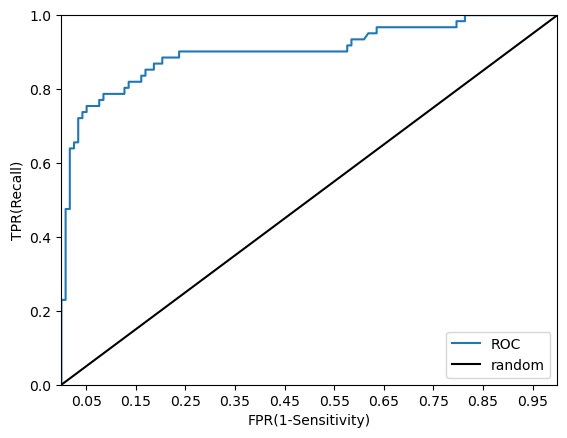

In [36]:
def roc_curve_plot(y_test, pred_proba_c1) :
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # roc 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0,1], [0,1], 'k-', label='random')
    # fpr x축의 scale을 0.1 단위로 변경, x,y축 명 설정 등
    start, end=plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

In [38]:
def get_clf_eval(y_test, pred=None, pred_proba=None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # roc_auc 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, \
    F1 : {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))